In [1]:
import os

# os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2'

import numpy as np
import jax.numpy as jnp
import jax.random as jr
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

In [2]:
%cd ~/cdv

/home/nmiklaucic/cdv


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from pathlib import Path
import pyrallis
from cdv.config import MainConfig
import orbax.checkpoint as ocp

from cdv.training_state import TrainingRun
from cdv.checkpointing import best_ckpt

# run_dir = Path('logs') / '03-17:45_918'
# run_dir = Path('logs') / 'e_form_no_downsample_564'
# run_dir = Path('logs') / 'e_form_equivariant_patch_235'
# run_dir = Path('logs') / '04-13-interrupted-919'
# run_dir = Path('logs') / '04-13-14_650'
run_dir = Path('logs') / 'mace_vae_994'

with open(run_dir / 'config.toml') as conf_file:
    config = pyrallis.cfgparsing.load(MainConfig, conf_file)

model = config.build_vae()

ckpt = best_ckpt(run_dir)
# ckpt = jax.tree.map(lambda x: x if isinstance(x, (float, int)) else x.astype(jnp.bfloat16), ckpt)
model = model.bind(ckpt['state']['params'])

Configured `CheckpointManager` using deprecated legacy API. Please follow the instructions at                      
https://orbax.readthedocs.io/en/latest/api_refactor.html to migrate by May 1st, 2024.

Given directory is read only=/home/nmiklaucic/cdv/logs/mace_vae_994/final_ckpt/ckpts

Restoring item from /home/nmiklaucic/cdv/logs/mace_vae_994/final_ckpt/ckpts/3799.

Finished restoring checkpoint from /home/nmiklaucic/cdv/logs/mace_vae_994/final_ckpt/ckpts/3799.

In [4]:
from cdv.utils import debug_structure, debug_stat
params = ckpt['state']['params']['params']
debug_structure(params);
debug_stat(params);

arg0
├── decoder >>> decoder >>> mace
│   ├── global_proj_mlp >>> Dense_0
│   │   ├── bias
│   │   │   └── f32[256]
│   │   └── kernel
│   │       └── f32[384, 256]
│   ├── layer_0
│   │   ├── EquivariantProductBasisBlock_0
│   │   │   ├── SymmetricContraction_0
│   │   │   │   ├── species_radial_mlp
│   │   │   │   │   └── {...}
│   │   │   │   ├── w1_0e
│   │   │   │   │   └── f32[32, 1, 256]
│   │   │   │   ├── w1_1o
│   │   │   │   │   └── f32[32, 1, 256]
│   │   │   │   ├── w2_0e
│   │   │   │   │   └── f32[32, 3, 256]
│   │   │   │   └── w2_1o
│   │   │   │       └── f32[32, 2, 256]
│   │   │   └── proj_out
│   │   │       ├── w[0,0] 256x0e,256x0e
│   │   │       │   └── f32[256, 256]
│   │   │       └── w[1,1] 256x1o,256x1o
│   │   │           └── f32[256, 256]
│   │   ├── InteractionBlock_0
│   │   │   ├── linear_down
│   │   │   │   ├── w[0,0] 256x0e,256x0e
│   │   │   │   │   └── f32[256, 256]
│   │   │   │   ├── w[1,1] 256x1o,256x1o
│   │   │   │   │   └── f32[256, 256]
│   │   │   │   └── w[2,2] 256x2e,256x2e
│   │   │   │       └── f32[256, 256]
│   │   │   └── linear_up >>> w[0,0] 256x0e,256x0e
│   │   │       └── f32[256, 256]
│   │   ├── LinearReadoutBlock_0 >>> Linear_0 >>> w[1,0] 256x1o,1x1o
│   │   │   └── f32[256, 1]
│   │   └── MessagePassingConvolution_0 >>> LazyInMLP_0
│   │       ├── Dense_0
│   │       │   ├── bias
│   │       │   │   └── f32[388]
│   │       │   └── kernel
│   │       │       └── f32[8, 388]
│   │       ├── Dense_1
│   │       │   ├── bias
│   │       │   │   └── f32[768]
│   │       │   └── kernel
│   │       │       └── f32[388, 768]
│   │       └── WeightNorm_0 >>> Dense_0/kernel/scale
│   │           └── f32[388]
│   ├── layer_1
│   │   ├── EquivariantProductBasisBlock_0
│   │   │   ├── SymmetricContraction_0
│   │   │   │   ├── species_radial_mlp
│   │   │   │   │   └── {...}
│   │   │   │   ├── w1_0e
│   │   │   │   │   └── f32[32, 1, 256]
│   │   │   │   ├── w1_1o
│   │   │   │   │   └── f32[32, 1, 256]
│   │   │   │   ├── w2_0e
│   │   │   │   │   └── f32[32, 3, 256]
│   │   │   │   └── w2_1o
│   │   │   │       └── f32[32, 2, 256]
│   │   │   └── proj_out
│   │   │       ├── w[0,0] 256x0e,256x0e
│   │   │       │   └── f32[256, 256]
│   │   │       └── w[1,1] 256x1o,256x1o
│   │   │           └── f32[256, 256]
│   │   ├── InteractionBlock_0
│   │   │   ├── linear_down
│   │   │   │   ├── w[0,0] 512x0e,256x0e
│   │   │   │   │   └── f32[512, 256]
│   │   │   │   ├── w[1,1] 768x1o,256x1o
│   │   │   │   │   └── f32[768, 256]
│   │   │   │   └── w[2,2] 512x2e,256x2e
│   │   │   │       └── f32[512, 256]
│   │   │   └── linear_up
│   │   │       ├── w[0,0] 256x0e,256x0e
│   │   │       │   └── f32[256, 256]
│   │   │       └── w[1,1] 256x1o,256x1o
│   │   │           └── f32[256, 256]
│   │   ├── MessagePassingConvolution_0 >>> LazyInMLP_0
│   │   │   ├── Dense_0
│   │   │   │   ├── bias
│   │   │   │   │   └── f32[900]
│   │   │   │   └── kernel
│   │   │   │       └── f32[8, 900]
│   │   │   ├── Dense_1
│   │   │   │   ├── bias
│   │   │   │   │   └── f32[1792]
│   │   │   │   └── kernel
│   │   │   │       └── f32[900, 1792]
│   │   │   └── WeightNorm_0 >>> Dense_0/kernel/scale
│   │   │       └── f32[900]
│   │   └── NonLinearReadoutBlock_0
│   │       ├── Linear_0
│   │       │   ├── w[0,0] 256x0e,256x0e
│   │       │   │   └── f32[256, 256]
│   │       │   ├── w[0,2] 256x0e,256x0e
│   │       │   │   └── f32[256, 256]
│   │       │   └── w[1,1] 256x1o,256x1o
│   │       │       └── f32[256, 256]
│   │       └── Linear_1 >>> w[1,0] 256x1o,1x1o
│   │           └── f32[256, 1]
│   └── node_embedding >>> embed >>> embedding
│       └── f32[72, 256]
├── encoder
│   ├── encoder >>> mace
│   │   ├── layer_0
│   │   │   ├── EquivariantProductBasisBlock_0
│   │   │   │   ├── SymmetricContraction_0
│   │   │   │   │   └── {...}
│   │   │   │   └── proj_out
│   │   │   │       └── {...}
│   │   │   ├── InteractionBlock_0
│   │   │   │   ├── linear_down
│   │   │   │   │   └── {...}
│ 

arg0
├── decoder >>> decoder >>> mace
│   ├── global_proj_mlp >>> Dense_0
│   │   ├── bias
│   │   │   └──     (  -0.254   -0.047 -0.00444   0.0463    0.307)  0.00232 ±   0.0932
│   │   └── kernel
│   │       └──     (  -0.265  -0.0428  -0.0019   0.0339    0.262) -0.00126 ±    0.056~
│   ├── layer_0
│   │   ├── EquivariantProductBasisBlock_0
│   │   │   ├── SymmetricContraction_0
│   │   │   │   ├── species_radial_mlp
│   │   │   │   │   └── {...}
│   │   │   │   ├── w1_0e
│   │   │   │   │   └──     (   -3.66   -0.653 -0.00271    0.649     3.37)  0.00245 ±    0.946
│   │   │   │   ├── w1_1o
│   │   │   │   │   └──     (   -3.99    -0.66  0.00365    0.645     3.21)  -0.0021 ±    0.945
│   │   │   │   ├── w2_0e
│   │   │   │   │   └──     (   -3.67   -0.626  -0.0351    0.482     3.42)  -0.0337 ±    0.953~
│   │   │   │   └── w2_1o
│   │   │   │       └──     (    -3.7   -0.608   0.0579    0.539     3.87)  -0.0136 ±    0.924~
│   │   │   └── proj_out
│   │   │       ├── w[0,0] 256x0e,256x0e
│   │   │       │   └──     (   -4.27   -0.716  -0.0306    0.546     4.07)  -0.0411 ±    0.984~
│   │   │       └── w[1,1] 256x1o,256x1o
│   │   │           └──     (   -3.97   -0.694   0.0347    0.531     3.87)   -0.018 ±    0.967~
│   │   ├── InteractionBlock_0
│   │   │   ├── linear_down
│   │   │   │   ├── w[0,0] 256x0e,256x0e
│   │   │   │   │   └──     (   -3.77   -0.705  -0.0492     0.61     4.33)  -0.0452 ±    0.965~
│   │   │   │   ├── w[1,1] 256x1o,256x1o
│   │   │   │   │   └──     (   -3.99   -0.733  -0.0211    0.556     4.49)  -0.0581 ±    0.979~
│   │   │   │   └── w[2,2] 256x2e,256x2e
│   │   │   │       └──     (   -4.37   -0.674  -0.0164    0.569     4.43)  -0.0343 ±    0.921~
│   │   │   └── linear_up >>> w[0,0] 256x0e,256x0e
│   │   │       └──     (   -4.32   -0.606   0.0117    0.457     4.46)   0.0108 ±    0.932~
│   │   ├── LinearReadoutBlock_0 >>> Linear_0 >>> w[1,0] 256x1o,1x1o
│   │   │   └──     (   -3.49   -0.684   -0.021    0.808      2.6)   0.0459 ±        1
│   │   └── MessagePassingConvolution_0 >>> LazyInMLP_0
│   │       ├── Dense_0
│   │       │   ├── bias
│   │       │   │   └──     (  -0.343  -0.0683  -0.0251   0.0213    0.359)  -0.0247 ±   0.0908
│   │       │   └── kernel
│   │       │       └──     (  -0.842   -0.265 -0.00471    0.251    0.831) -0.00649 ±    0.335
│   │       ├── Dense_1
│   │       │   ├── bias
│   │       │   │   └──     (  -0.309  -0.0272  0.00117   0.0247    0.521) -0.000656 ±   0.0668
│   │       │   └── kernel
│   │       │       └──     (  -0.573  -0.0311 -0.00136   0.0284    0.414) 0.000917 ±   0.0461~
│   │       └── WeightNorm_0 >>> Dense_0/kernel/scale
│   │           └──     (   0.622    0.879    0.909    0.928     1.05)    0.898 ±   0.0472
│   ├── layer_1
│   │   ├── EquivariantProductBasisBlock_0
│   │   │   ├── SymmetricContraction_0
│   │   │   │   ├── species_radial_mlp
│   │   │   │   │   └── {...}
│   │   │   │   ├── w1_0e
│   │   │   │   │   └──     (   -3.59    -0.64 -0.00483    0.637     3.21)  0.00389 ±    0.933
│   │   │   │   ├── w1_1o
│   │   │   │   │   └──     (   -3.43   -0.639  -0.0122    0.619     3.39) -0.00725 ±    0.935
│   │   │   │   ├── w2_0e
│   │   │   │   │   └──     (    -3.8   -0.653  -0.0382    0.484     4.05) -0.00645 ±     0.91~
│   │   │   │   └── w2_1o
│   │   │   │       └──     (   -3.88    -0.42    0.221    0.785     3.66)    0.163 ±    0.969~
│   │   │   └── proj_out
│   │   │       ├── w[0,0] 256x0e,256x0e
│   │   │       │   └──     (   -3.93   -0.675  -0.0909    0.504     3.77)   -0.034 ±     0.94~
│   │   │       └── w[1,1] 256x1o,256x1o
│   │   │           └──     (   -4.37   -0.701   0.0178    0.557     3.71)  -0.0555 ±    0.879~
│   │   ├── InteractionBlock_0
│   │   │   ├── linear_down
│   │   │   │   ├── w[0,0] 512x0e,256x0e
│   │   │   │   │   └──     (   -4.57   -0.595   0.0673    0.646     4.07)   0.0367 ±    0.919~
│   │   │   │   ├── w[1,1] 768x1o,256x1o
│   │   │   │   │   └──     (   -3.95   -0.651  -0.0519    0.618     4

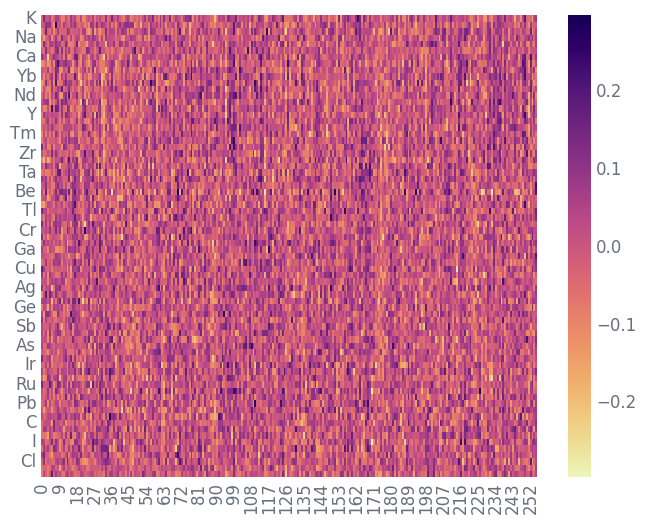

<Axes: >

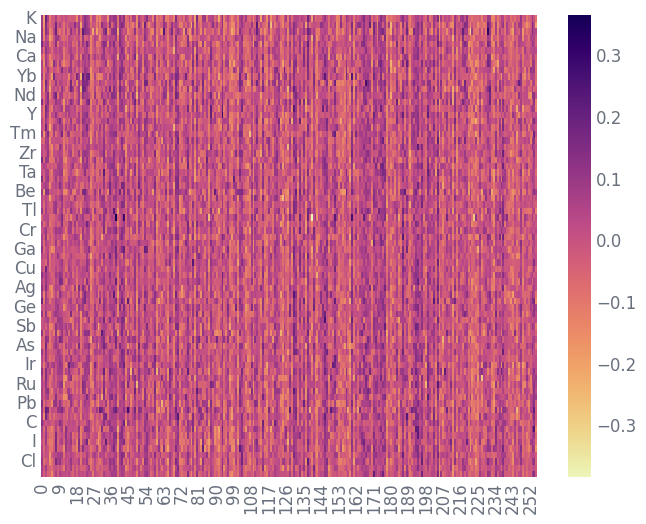

In [5]:
embed_enc = pd.DataFrame(params['encoder']['encoder']['mace']['node_embedding']['embed']['embedding'], index=config.data.metadata['elements'])
embed_dec = pd.DataFrame(params['decoder']['decoder']['mace']['node_embedding']['embed']['embedding'], index=config.data.metadata['elements'])

for df in embed_enc, embed_dec:
    df.columns = [str(x) for x in df.columns]

sns.heatmap(embed_enc, cmap='rho_heatmap')
plt.show()
sns.heatmap(embed_dec, cmap='rho_heatmap')

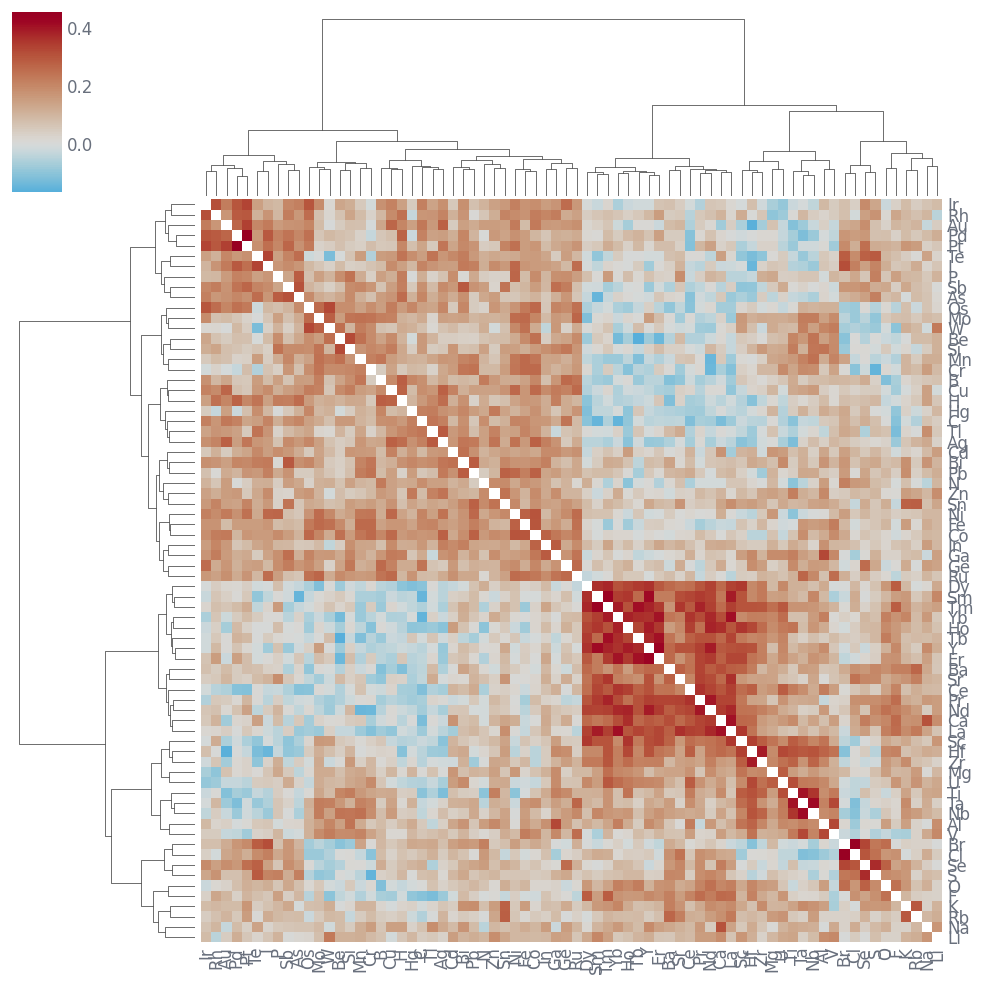

In [8]:
from scipy.spatial.distance import braycurtis, cityblock, correlation
corr = embed_enc.T.corr(method='pearson')
sns.clustermap(corr, xticklabels=1, yticklabels=1, cmap='rho_diverging', mask=np.eye(len(corr.index)), center=0,
               method='ward')

In [9]:
from cdv.dataset import load_file
from cdv.layers import Context

batch = load_file(config, 30)

rot_batch, rot_m = batch.rotate(123)

out = model.apply(ckpt['state']['params'], rngs=jr.key(123), cg=batch, ctx=Context(training=False))
rot_out = model.apply(ckpt['state']['params'], rngs=jr.key(123), cg=rot_batch, ctx=Context(training=False))

In [14]:
out, rot_out


(
    {
        'sparsity': Array(-0.23556805, dtype=float32),
        'β': Array(1.7010955e-06, dtype=float32),
        'embed': Array(6.804382e-06, dtype=float32),
        'ε_μ': Array(-0.02185485, dtype=float32),
        'rec': Array(0.6307149, dtype=float32),
        'enc': Array(-0.02355595, dtype=float32),
        'prop': Array(0.16446133, dtype=float32),
        'e_form': Array(0.8429922, dtype=float32),
        'lat': Array(0.27084047, dtype=float32),
        'sym': Array(0.53078055, dtype=float32),
        ... +1
    },
    {
        'sparsity': Array(-0.23556805, dtype=float32),
        'β': Array(1.701303e-06, dtype=float32),
        'embed': Array(6.805212e-06, dtype=float32),
        'ε_μ': Array(-0.02185485, dtype=float32),
        'rec': Array(0.6281466, dtype=float32),
        'enc': Array(-0.02355595, dtype=float32),
        'prop': Array(0.16446133, dtype=float32),
        'e_form': Array(0.8429922, dtype=float32),
        'lat': Array(0.27084047, dtype=float32),
   

In [10]:
params['encoder']['latent_space']['lattice']


Array([-10.765684 , -22.868273 ,   5.352494 ,  -7.943006 ,  10.565562 ,
        12.358381 , -14.083181 ,  17.424488 ,  14.295252 ,   8.203225 ,
         7.506577 , -23.099306 ,   8.064326 ,  20.988615 , -23.827368 ,
         6.8028436, -17.343197 ,  15.132771 ,  15.612097 ,  23.248667 ,
        23.35781  , -11.503507 , -17.169113 ,  12.88508  , -14.232542 ,
        19.050358 ,  20.88718  ,  -8.34493  , -17.73784  ,   7.302785 ,
       -14.684404 ,  -5.0355067, -18.772827 ,  -9.609791 , -18.67147  ,
        -8.737557 , -21.48362  ,  14.566016 ,   6.89766  , -10.580643 ,
       -23.763014 ,  15.671017 ,   8.472346 ,  -9.990379 ,  19.312513 ,
         9.319757 ,  20.237404 ,  -8.113161 ,  23.955154 ,  19.345484 ,
       -11.578743 ,  14.6039095,   5.01467  ,   7.843842 ,  19.133768 ,
       -11.349329 , -11.496277 , -23.246298 , -10.931025 , -10.647874 ,
        12.839097 ,   5.86279  ,   5.204741 , -18.49626  ,  15.322813 ,
        -8.0366535,  12.285552 , -17.327293 , -18.441975 , -14.

In [12]:
z_e = model.encoder.encoder.apply({'params': ckpt['state']['params']['params']['encoder']['encoder']}, rngs=jr.key(123), cg=batch, ctx=Context(training=False))

In [15]:
z = model.encoder.apply({'params': ckpt['state']['params']['params']['encoder']}, rngs=jr.key(123), cg=batch, ctx=Context(training=False))
z


LatentOutput(
    z_e=Array([[-1.9010903e+00,  2.9962677e-01, -2.1614068e+00, ...,
         8.0647551e-02, -3.1971189e-01, -5.2313995e-01],
       [-8.0160148e-02,  3.3819646e-02, -4.7169188e-01, ...,
         2.6847668e-02, -3.3526419e-04, -1.7392145e-01],
       [-5.5304992e-01, -1.0731219e-01, -1.8283564e+00, ...,
         3.2016918e-01,  2.9609483e-01, -2.5534317e-01],
       ...,
       [ 2.5969112e-01,  1.4276020e-01,  1.9481441e-01, ...,
        -8.1568219e-02,  2.5722636e-02, -1.4480089e-01],
       [ 7.0588969e-05,  8.9426780e-05, -4.0320676e-05, ...,
         1.9887838e-04, -5.0411800e-05, -1.4425047e-04],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32),
    output=Array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0.

In [22]:
jnp.sum(z.output, axis=1)


Array([ 22.899235 ,   0.       ,   0.       ,   0.       , -10.337889 ,
         0.       ,   0.       ,   0.       ,   2.444026 ,   0.       ,
         0.       ,   0.       ,  15.262512 ,   3.407794 ,   0.       ,
         0.       ,   0.       ,   5.0355067,   0.       ,   0.       ,
         0.       ,  10.796835 ,   0.       ,  -5.0355067,  10.247843 ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,  -1.0698471,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,  -1.4794006,
         0.       ,   0.       ,   0.       ,  -1.9669437,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ], dtype=float32)